In [2]:
# data visualisation and manipulation
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from datetime import datetime
import calendar


#label Encoding on Train and Test 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder


#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import GridSearchCV

#import the necessary modelling algos
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
#from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error


In [6]:
data=pd.read_csv('/content/traindataset.txt')
data1=pd.read_csv('/content/testdataset.txt')

In [5]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
data1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# Shape of the dataset
print('Shape of the Train data:',data.shape)
print('Shape of the Test data:',data1.shape)


Shape of the Train data: (6493, 9)
Shape of the Test data: (10886, 12)


In [9]:
# Checking the data types of each column of this dataset.
print('Data type of Train data :\n', data.dtypes,'\n\n')
print('Data type of Test data :\n', data1.dtypes)


Data type of Train data :
 datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object 


Data type of Test data :
 datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [10]:
# Checking the columns of both the data.
print('Columns of Train data :\n' , data.columns,'\n\n\n')
print('Columns of Test data :\n', data1.columns)


Columns of Train data :
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object') 



Columns of Test data :
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [11]:

# Information of both the data
print( data.info(),'\n\n')
print( data1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB
None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather    

In [12]:
# Describe both data
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [13]:
data1.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [14]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["day"] = data.datetime.apply(lambda x : x.split()[0].split("-")[2])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0])
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])
data["month"] = data.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])


In [15]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,day,hour,year,weekday,month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011-01-20,20,00,2011,Thursday,January
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,20,01,2011,Thursday,January
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,20,02,2011,Thursday,January
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,20,03,2011,Thursday,January
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,20,04,2011,Thursday,January


In [16]:
data1["date"] = data1.datetime.apply(lambda x : x.split()[0])
data1["day"] = data1.datetime.apply(lambda x : x.split()[0].split("-")[2])
data1["hour"] = data1.datetime.apply(lambda x : x.split()[1].split(":")[0])
data1["year"] = data1.datetime.apply(lambda x : x.split()[0].split("-")[0])
data1["weekday"] = data1.date.apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])
data1["month"] = data1.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])


In [17]:
data1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,01,00,2011,Saturday,January
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,01,2011,Saturday,January
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,01,02,2011,Saturday,January
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,01,03,2011,Saturday,January
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,01,04,2011,Saturday,January


In [18]:
# Number of unique values in each columns and unique values in each columns.

for i in data.columns:
    print("Unique value of = {} [[{}]]\n{}\n".format(i, len(data[i].unique()), data[i].unique()))

Unique value of = datetime [[6493]]
['2011-01-20 00:00:00' '2011-01-20 01:00:00' '2011-01-20 02:00:00' ...
 '2012-12-31 21:00:00' '2012-12-31 22:00:00' '2012-12-31 23:00:00']

Unique value of = season [[4]]
[1 2 3 4]

Unique value of = holiday [[2]]
[0 1]

Unique value of = workingday [[2]]
[1 0]

Unique value of = weather [[4]]
[1 2 3 4]

Unique value of = temp [[49]]
[10.66  9.84  9.02 11.48 12.3  13.12  8.2   6.56  5.74  4.92  4.1   3.28
  2.46  1.64  0.82  7.38 13.94 14.76 17.22 15.58 16.4  21.32 22.14 22.96
 18.86 18.04 19.68 20.5  23.78 25.42 27.06 28.7  30.34 31.16 27.88 24.6
 26.24 29.52 31.98 33.62 32.8  35.26 36.08 36.9  34.44 37.72 38.54 39.36
 40.18]

Unique value of = atemp [[65]]
[11.365 13.635 12.88  10.605 16.665 14.395 15.15  15.91  12.12   9.85
  9.09   8.335  7.575  6.06   6.82   5.305  3.79   1.515  2.275  0.
  0.76   3.03   4.545 17.425 18.18  21.21  19.695 20.455 25.    25.76
 26.515 22.725 21.97  23.485 24.24  27.275 30.305 31.06  32.575 33.335
 31.82  29.545 28.

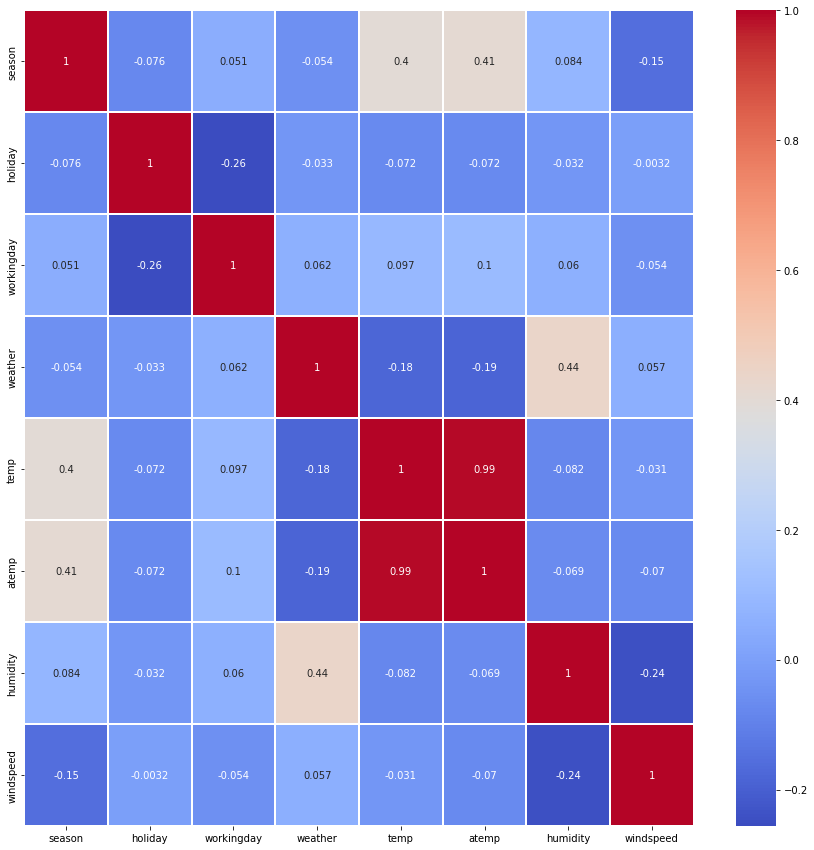

In [19]:

plt.figure(figsize=(15,15))    
ax = sns.heatmap(data.corr(), cmap = "coolwarm", annot=True, linewidth=1)
bottom, top = ax.get_ylim()


12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
09    455
08    455
07    455
06    455
00    455
01    454
05    452
02    448
04    442
03    433
Name: hour, dtype: int64


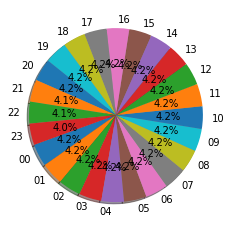

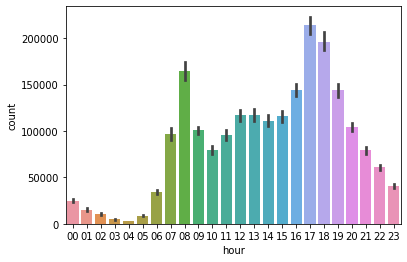

In [40]:
print(data1.hour.value_counts())
values=data1['hour'].value_counts().values
label=['00', '01', '02', '03', '04', '05','06', '07', '08', '09', '10', '11','12','13','14', '15','16','17','18','19', '20', '21', '22', '23']
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=200,autopct='%1.1f%%')
plt.show()

sns.barplot(x='hour',y='count',data=data1,estimator = np.sum)
label=['00', '01', '02', '03', '04', '05','06', '07', '08', '09', '10', '11','12','13','14', '15','16','17','18','19', '20', '21', '22', '23']
plt.show()



4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64


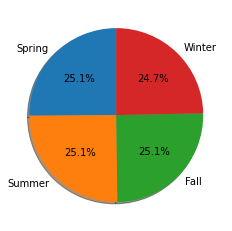

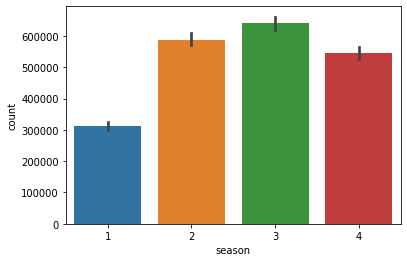

In [41]:
print(data1.season.value_counts())
values=data1['season'].value_counts().values
label=[ "Spring", "Summer", "Fall", "Winter"]
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=90,autopct='%1.1f%%')
plt.show()

sns.barplot(x='season',y='count',data=data1,estimator = np.sum)
label=[ "Spring", "Summer", "Fall", "Winter"]
plt.show()

0    10575
1      311
Name: holiday, dtype: int64


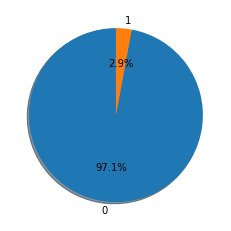

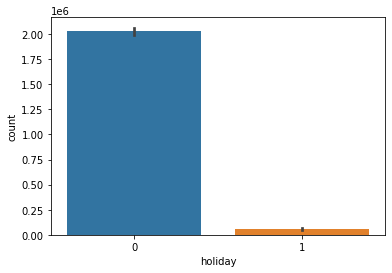

In [43]:
print(data1.holiday.value_counts())
values=data['holiday'].value_counts().values
label=[0,1]
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=90,autopct='%1.1f%%')
plt.show()

sns.barplot(x='holiday',y='count',data=data1, estimator = np.sum)
label=[0,1]
plt.show()




1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


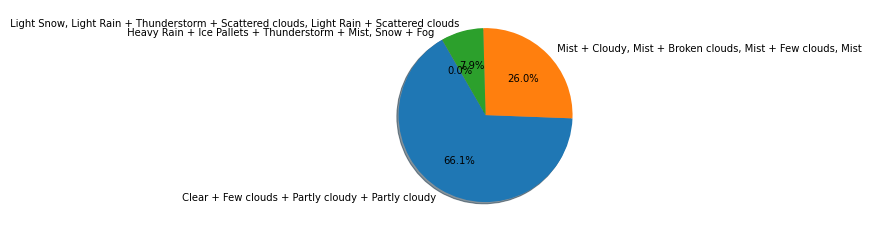

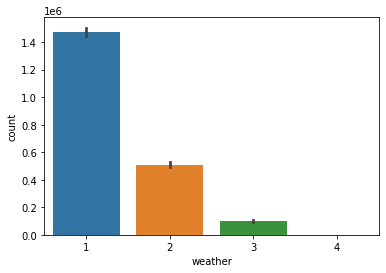

In [45]:
print(data1.weather.value_counts())
values=data1['weather'].value_counts().values
label=[" Clear + Few clouds + Partly cloudy + Partly cloudy", " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ",  " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", " Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog "]
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=120,autopct='%1.1f%%')
plt.show()

sns.barplot(x='weather',y='count',data=data1,estimator = np.sum)
label=[" Clear + Few clouds + Partly cloudy + Partly cloudy", " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ",  " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", " Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog "]

plt.show()



Saturday     1584
Sunday       1579
Thursday     1553
Monday       1551
Wednesday    1551
Tuesday      1539
Friday       1529
Name: weekday, dtype: int64


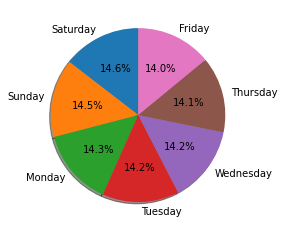

In [46]:
print(data1.weekday.value_counts())
values=data1['weekday'].value_counts().values
label=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=90,autopct='%1.1f%%')
plt.show()


May          912
June         912
July         912
August       912
December     912
October      911
November     911
April        909
September    909
February     901
March        901
January      884
Name: month, dtype: int64


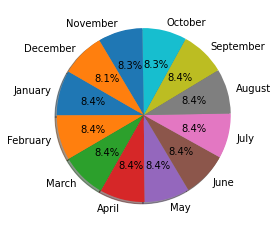

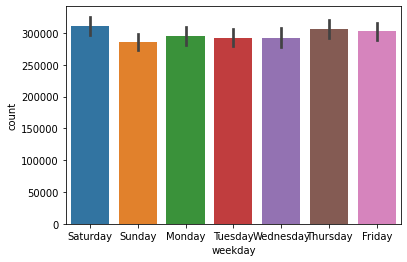

In [49]:
print(data1.month.value_counts())
values=data1['month'].value_counts().values
label=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=150,autopct='%1.1f%%')
plt.show()

sns.barplot(x='weekday',y='count',data=data1, estimator = np.sum)
label=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.show()



In [50]:
data1  = data1.drop(["datetime", 'casual', 'registered','date' ],axis=1)


In [52]:
data1.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,hour,year,weekday,month
0,1,0,0,1,9.84,14.395,81,0.0,16,01,00,2011,Saturday,January
1,1,0,0,1,9.02,13.635,80,0.0,40,01,01,2011,Saturday,January
2,1,0,0,1,9.02,13.635,80,0.0,32,01,02,2011,Saturday,January
3,1,0,0,1,9.84,14.395,75,0.0,13,01,03,2011,Saturday,January
4,1,0,0,1,9.84,14.395,75,0.0,1,01,04,2011,Saturday,January


In [53]:
data=data.drop(['date'],axis=1)

In [54]:
data.shape

(6493, 14)

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
day           0
hour          0
year          0
weekday       0
month         0
dtype: int64


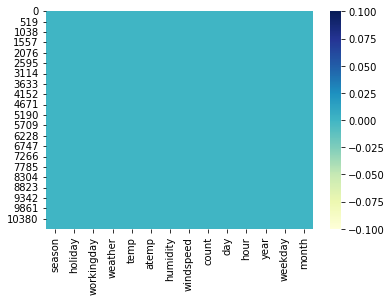

In [55]:
# Train data set
print(data1.isnull().sum())

# Visualizing the same using heatmap.
sns.heatmap(data1.isnull(), cmap = 'YlGnBu')

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
day           0
hour          0
year          0
weekday       0
month         0
dtype: int64


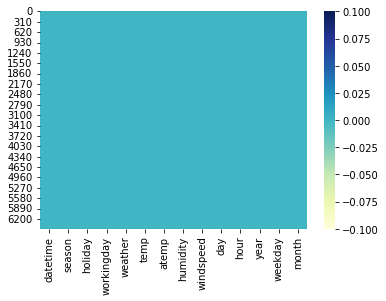

In [56]:
# Train data set
print(data.isnull().sum())

# Visualizing the same using heatmap.
sns.heatmap(data.isnull(), cmap = 'YlGnBu')

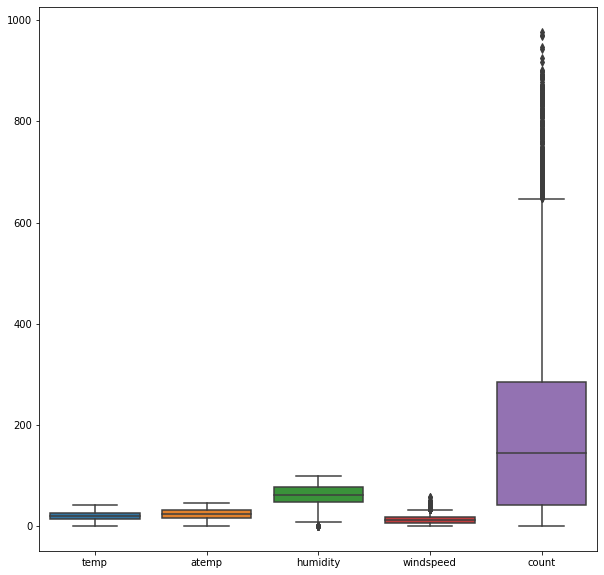

In [57]:
sns.boxplot(data=data1[['temp','atemp', 'humidity', 'windspeed', 'count']])
fig=plt.gcf()
fig.set_size_inches(10,10)


In [62]:
cnames = ['temp','atemp', 'humidity', 'windspeed', 'count']
for i in cnames:
    print(i)
    q75, q25 = np.percentile( data1.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25-(iqr*1.5)
    max = q75+(iqr*1.5)
    print(min)
    print(max)
   
    data1= data1.drop( data1[ data1.loc[:,i] < min].index)
    data1 = data1.drop( data1[ data1.loc[:,i] > max].index)



temp
-4.51
44.69
atemp
-4.927500000000002
52.6525
humidity
2.0
122.0
windspeed
-7.993100000000002
31.992500000000003
count
-322.5
649.5


In [63]:
data1.shape

(10352, 14)

In [64]:
#Train data
data1['weekday']=label_encoder.fit_transform(data1['weekday'])
data1['month']=label_encoder.fit_transform(data1['month'])
data1['year']=label_encoder.fit_transform(data1['year'])

In [65]:
#Test data
data['weekday']=label_encoder.fit_transform(data['weekday'])
data['month']=label_encoder.fit_transform(data['month'])
data['year']=label_encoder.fit_transform(data['year'])

In [66]:
object_Variable_List = ["hour",'day']
for i in object_Variable_List:
    data1[i] = data1[i].astype("int64")
    data[i] = data[i].astype("int64")



In [69]:
data1.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
day             int64
hour            int64
year            int64
weekday         int64
month           int64
dtype: object

In [73]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
day             int64
hour            int64
year            int64
weekday         int64
month           int64
dtype: object

In [70]:
X = data1.drop('count', axis=1)
Y = data1['count']


In [74]:
# Let's check the Shape of Input and Output variables.

print(X.shape)
print(Y.shape)


(10352, 13)
(10352,)


In [75]:

X.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,hour,year,weekday,month
0,1,0,0,1,9.84,14.395,81,0.0,1,0,0,2,4
1,1,0,0,1,9.02,13.635,80,0.0,1,1,0,2,4
2,1,0,0,1,9.02,13.635,80,0.0,1,2,0,2,4
3,1,0,0,1,9.84,14.395,75,0.0,1,3,0,2,4
4,1,0,0,1,9.84,14.395,75,0.0,1,4,0,2,4


In [76]:

# Checking the Dependent variable.

Y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [77]:
# Importing library for split Train data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.25)

In [78]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','KNeighborsRegressor']
r2score=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,Y_train)
    test_pred=clf.predict(X_test)
    r2score.append(np.sqrt(r2_score(test_pred,Y_test)))
d={'Modelling Algo':model_names,'R2_error':r2score}   

In [79]:
d

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'KNeighborsRegressor'],
 'R2_error': [0.9596347374020632,
  0.6754851554666884,
  0.9554178832214634,
  0.47206151779237887]}

In [80]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,R2_error
0,RandomForestRegressor,0.959635
1,AdaBoostRegressor,0.675485
2,BaggingRegressor,0.955418
3,KNeighborsRegressor,0.472062


In [81]:

#for random forest regresion.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(X_train,Y_train)
pred=clf_rf.predict(X_test)
print((np.sqrt(mean_squared_log_error(pred,Y_test))))



0.35561867241707246


In [83]:
pred=clf_rf.predict(data.drop('datetime',axis=1))
d={'datetime':data['datetime'],'count':pred}
ans=pd.DataFrame(d)
ans.to_csv('answer.csv',index=False)



In [84]:
pd.read_csv('answer.csv')

,datetime,count
0,2011-01-20 00:00:00,13.324
1,2011-01-20 01:00:00,4.726
2,2011-01-20 02:00:00,4.154
3,2011-01-20 03:00:00,3.574
4,2011-01-20 04:00:00,3.292
...,...,...
6488,2012-12-31 19:00:00,220.376
6489,2012-12-31 20:00:00,153.728
6490,2012-12-31 21:00:00,99.700
6491,2012-12-31 22:00:00,106.514
